### Maven Commuter Challenge

Create an interactive dashboard illustrating post-pandemic ridership recovery trends across the MTA's services.

#### About The Data Set:

The daily ridership dataset provides systemwide ridership and traffic estimates for the Metropolitan Transportation Authority's (MTA) different services beginning March 1st, 2020, and provides a percentage comparison against pre-pandemic figures.

#### Challenge Objective:

This challenge is a collaboration between Maven Analytics and Plotly!

For the Maven Commuter Challenge, you work as a Data Visualization Specialist for the Data & Analytics Team at the Metropolitan Transportation Authority (MTA), North America's largest transportation network.

Your task is to create an interactive visual or dashboard that illustrates post-pandemic ridership recovery trends across the MTA's services.

In [54]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [55]:
# load the dataset
mta_data = pd.read_csv("Dataset/MTA_Daily_Ridership.csv")
mta_data.shape

(1706, 15)

In [56]:
# take a look at the data
mta_data.head()

Date  Subways: Total Estimated Ridership  \
0  2020-03-01                             2212965   
1  2020-03-02                             5329915   
2  2020-03-03                             5481103   
3  2020-03-04                             5498809   
4  2020-03-05                             5496453   

   Subways: % of Comparable Pre-Pandemic Day  \
0                                         97   
1                                         96   
2                                         98   
3                                         99   
4                                         99   

   Buses: Total Estimated Ridership  Buses: % of Comparable Pre-Pandemic Day  \
0                            984908                                       99   
1                           2209066                                       99   
2                           2228608                                       99   
3                           2177165                                       97   
4                           2244515                                      100   

   LIRR: Total Estimated Ridership  LIRR: % of Comparable Pre-Pandemic Day  \
0                            86790                                     100   
1                           321569                                     103   
2                           319727                                     102   
3                           311662                                      99   
4                           307597                                      98   

   Metro-North: Total Estimated Ridership  \
0                                   55825   
1                                  180701   
2                                  190648   
3                                  192689   
4                                  194386   

   Metro-North: % of Comparable Pre-Pandemic Day  \
0                                             59   
1                                             66   
2                                             69   
3                                             70   
4                                             70   

   Access-A-Ride: Total Scheduled Trips  \
0                                 19922   
1                                 30338   
2                                 32767   
3                                 34297   
4                                 33209   

   Access-A-Ride: % of Comparable Pre-Pandemic Day  \
0                                              113   
1                                              102   
2                                              110   
3                                              115   
4                                              112   

   Bridges and Tunnels: Total Traffic  \
0                              786960   
1                              874619   
2                              882175   
3                              905558   
4                              929298   

   Bridges and Tunnels: % of Comparable Pre-Pandemic Day  \
0                                                 98       
1                                                 95       
2                                                 96       
3                                                 98       
4                                                101       

   Staten Island Railway: Total Estimated Ridership  \
0                                              1636   
1                                             17140   
2                                             17453   
3                                             17136   
4                                             17203   

   Staten Island Railway: % of Comparable Pre-Pandemic Day  
0                                                 52        
1                                                107        
2                                                109        
3                                                107        
4                                      

In [57]:
# Datatypes
mta_data.dtypes

Date                                                       object
Subways: Total Estimated Ridership                          int64
Subways: % of Comparable Pre-Pandemic Day                   int64
Buses: Total Estimated Ridership                            int64
Buses: % of Comparable Pre-Pandemic Day                     int64
LIRR: Total Estimated Ridership                             int64
LIRR: % of Comparable Pre-Pandemic Day                      int64
Metro-North: Total Estimated Ridership                      int64
Metro-North: % of Comparable Pre-Pandemic Day               int64
Access-A-Ride: Total Scheduled Trips                        int64
Access-A-Ride: % of Comparable Pre-Pandemic Day             int64
Bridges and Tunnels: Total Traffic                          int64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day       int64
Staten Island Railway: Total Estimated Ridership            int64
Staten Island Railway: % of Comparable Pre-Pandemic Day     int64
dtype: obj

In [58]:
# Descriptive Statistics
mta_data.describe().T

count          mean  \
Subways: Total Estimated Ridership                  1706.0  2.509055e+06   
Subways: % of Comparable Pre-Pandemic Day           1706.0  5.546131e+01   
Buses: Total Estimated Ridership                    1706.0  1.006868e+06   
Buses: % of Comparable Pre-Pandemic Day             1706.0  5.469285e+01   
LIRR: Total Estimated Ridership                     1706.0  1.359601e+05   
LIRR: % of Comparable Pre-Pandemic Day              1706.0  5.912837e+01   
Metro-North: Total Estimated Ridership              1706.0  1.148883e+05   
Metro-North: % of Comparable Pre-Pandemic Day       1706.0  5.108324e+01   
Access-A-Ride: Total Scheduled Trips                1706.0  2.194153e+04   
Access-A-Ride: % of Comparable Pre-Pandemic Day     1706.0  8.616530e+01   
Bridges and Tunnels: Total Traffic                  1706.0  8.556029e+05   
Bridges and Tunnels: % of Comparable Pre-Pandem...  1706.0  9.337515e+01   
Staten Island Railway: Total Estimated Ridership    1706.0  4.429355e+03   
Staten Island Railway: % of Comparable Pre-Pand...  1706.0  3.781125e+01   

                                                             std       min  \
Subways: Total Estimated Ridership                  1.062184e+06  198399.0   
Subways: % of Comparable Pre-Pandemic Day           1.981960e+01       7.0   
Buses: Total Estimated Ridership                    4.403799e+05    5498.0   
Buses: % of Comparable Pre-Pandemic Day             1.929331e+01       1.0   
LIRR: Total Estimated Ridership                     7.129878e+04    1903.0   
LIRR: % of Comparable Pre-Pandemic Day              2.929799e+01       2.0   
Metro-North: Total Estimated Ridership              6.650021e+04    3281.0   
Metro-North: % of Comparable Pre-Pandemic Day       2.613731e+01       3.0   
Access-A-Ride: Total Scheduled Trips                7.990635e+03    2506.0   
Access-A-Ride: % of Comparable Pre-Pandemic Day     2.464506e+01      13.0   
Bridges and Tunnels: Total Traffic                  1.431840e+05  156759.0   
Bridges and Tunnels: % of Comparable Pre-Pandem...  1.464196e+01      18.0   
Staten Island Railway: Total Estimated Ridership    2.681656e+03       0.0   
Staten Island Railway: % of Comparable Pre-Pand...  1.927321e+01       0.0   

                                                           25%        50%  \
Subways: Total Estimated Ridership                  1715396.00  2459607.0   
Subways: % of Comparable Pre-Pandemic Day                40.00       61.0   
Buses: Total Estimated Ridership                     715249.50  1140776.5   
Buses: % of Comparable Pre-Pandemic Day                  53.00       60.0   
LIRR: Total Estimated Ridership                       78689.75   124274.0   
LIRR: % of Comparable Pre-Pandemic Day                   37.00       60.0   
Metro-North: Total Estimated Ridership                51271.25   108237.0   
Metro-North: % of Comparable Pre-Pandemic Day            29.00       56.0   
Access-A-Ride: Total Scheduled Trips                  15869.50    22301.5   
Access-A-Ride: % of Comparable Pre-Pandemic Day          72.00       84.0   
Bridges and Tunnels: Total Traffic                   810338.50   896634.5   
Bridges and Tunnels: % of Comparable Pre-Pandem...       90.00       97.0   
Staten Island Railway: Total Estimated Ridership       2077.25     4522.5   
Staten Island Railway: % of Comparable Pre-Pand...       24.00       40.0   

                                                           75%        max  
Subways: Total Estimated Ridership                  3440053.25  5498809.0  
Subways: % of Comparable Pre-Pandemic Day                69.00      143.0  
Buses: Total Estimated Ridership                    1347619.50  2244515.0  
Buses: % of Comparable Pre-Pandemic Day                  65.00      126.0  
LIRR: Total Estimated Ridership                      197928.00   321569.0  
LIRR: % of Comparable Pre-Pandemic Day                   76.00      237.0  
Metro-North: Total Estimated Ridership               

In [59]:
# Concise Information
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Date                                                     1706 non-null   object
 1   Subways: Total Estimated Ridership                       1706 non-null   int64 
 2   Subways: % of Comparable Pre-Pandemic Day                1706 non-null   int64 
 3   Buses: Total Estimated Ridership                         1706 non-null   int64 
 4   Buses: % of Comparable Pre-Pandemic Day                  1706 non-null   int64 
 5   LIRR: Total Estimated Ridership                          1706 non-null   int64 
 6   LIRR: % of Comparable Pre-Pandemic Day                   1706 non-null   int64 
 7   Metro-North: Total Estimated Ridership                   1706 non-null   int64 
 8   Metro-North: % of Comparable Pre-Pande

In [60]:
# check for null/missing values
mta_data.isnull().sum()

Date                                                       0
Subways: Total Estimated Ridership                         0
Subways: % of Comparable Pre-Pandemic Day                  0
Buses: Total Estimated Ridership                           0
Buses: % of Comparable Pre-Pandemic Day                    0
LIRR: Total Estimated Ridership                            0
LIRR: % of Comparable Pre-Pandemic Day                     0
Metro-North: Total Estimated Ridership                     0
Metro-North: % of Comparable Pre-Pandemic Day              0
Access-A-Ride: Total Scheduled Trips                       0
Access-A-Ride: % of Comparable Pre-Pandemic Day            0
Bridges and Tunnels: Total Traffic                         0
Bridges and Tunnels: % of Comparable Pre-Pandemic Day      0
Staten Island Railway: Total Estimated Ridership           0
Staten Island Railway: % of Comparable Pre-Pandemic Day    0
dtype: int64

In [61]:
# check for duplicate records
mta_data.duplicated().sum()

0

In [62]:
# Convert 'Date' column to datetime format
mta_data['Date'] = pd.to_datetime(mta_data['Date'])

In [63]:
# Simplify column names for readability in visuals
mta_data.columns = [
    'Date', 'Subways_Ridership', 'Subways_Pre_Pandemic_Percent', 
    'Buses_Ridership', 'Buses_Pre_Pandemic_Percent', 
    'LIRR_Ridership', 'LIRR_Pre_Pandemic_Percent', 
    'MetroNorth_Ridership', 'MetroNorth_Pre_Pandemic_Percent', 
    'AccessARide_Trips', 'AccessARide_Pre_Pandemic_Percent', 
    'BridgesTunnels_Traffic', 'BridgesTunnels_Pre_Pandemic_Percent', 
    'StatenIsland_Ridership', 'StatenIsland_Pre_Pandemic_Percent'
]

In [64]:
mta_data.head()

Date  Subways_Ridership  Subways_Pre_Pandemic_Percent  \
0 2020-03-01            2212965                            97   
1 2020-03-02            5329915                            96   
2 2020-03-03            5481103                            98   
3 2020-03-04            5498809                            99   
4 2020-03-05            5496453                            99   

   Buses_Ridership  Buses_Pre_Pandemic_Percent  LIRR_Ridership  \
0           984908                          99           86790   
1          2209066                          99          321569   
2          2228608                          99          319727   
3          2177165                          97          311662   
4          2244515                         100          307597   

   LIRR_Pre_Pandemic_Percent  MetroNorth_Ridership  \
0                        100                 55825   
1                        103                180701   
2                        102                190648   
3                         99                192689   
4                         98                194386   

   MetroNorth_Pre_Pandemic_Percent  AccessARide_Trips  \
0                               59              19922   
1                               66              30338   
2                               69              32767   
3                               70              34297   
4                               70              33209   

   AccessARide_Pre_Pandemic_Percent  BridgesTunnels_Traffic  \
0                               113                  786960   
1                               102                  874619   
2                               110                  882175   
3                               115                  905558   
4                               112                  929298   

   BridgesTunnels_Pre_Pandemic_Percent  StatenIsland_Ridership  \
0                                   98                    1636   
1                                   95                   17140   
2                                   96                   17453   
3                                   98                   17136   
4                                  101                   17203   

   StatenIsland_Pre_Pandemic_Percent  
0                                 52  
1                                107  
2                                109  
3                                107  
4                                108

### Exploratory Data Analysis (EDA):

In [65]:
# Visualizing Subway Ridership and Recovery Percentage Over Time

# Line chart for Subway Ridership
fig = px.line(mta_data, x='Date', y='Subways_Ridership', title='Daily Subway Ridership Over Time')
fig.show()

# Line chart for Subway Ridership as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='Subways_Pre_Pandemic_Percent', title='Subway Recovery Percentage Over Time')
fig.show()

In [66]:
# Visualizing Buses Ridership and Recovery Percentage Over Time

# Line chart for Buses Ridership
fig = px.line(mta_data, x='Date', y='Buses_Ridership', title='Daily Buses Ridership Over Time')
fig.show()

# Line chart for Buses Ridership as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='Buses_Pre_Pandemic_Percent', title='Buses Recovery Percentage Over Time')
fig.show()

In [67]:
# Visualizing LIRR Ridership and Recovery Percentage Over Time

# Line chart for LIRR Ridership
fig = px.line(mta_data, x='Date', y='LIRR_Ridership', title='Daily LIRR Ridership Over Time')
fig.show()

# Line chart for LIRR Ridership as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='LIRR_Pre_Pandemic_Percent', title='LIRR Recovery Percentage Over Time')
fig.show()

In [68]:
# Visualizing MetroNorth Ridership and Recovery Percentage Over Time

# Line chart for MetroNorth Ridership
fig = px.line(mta_data, x='Date', y='MetroNorth_Ridership', title='Daily MetroNorth Ridership Over Time')
fig.show()

# Line chart for MetroNorth Ridership as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='MetroNorth_Pre_Pandemic_Percent', title='MetroNorth Recovery Percentage Over Time')
fig.show()

In [69]:
# Visualizing Access-A-Ride Trips and Recovery Percentage Over Time

# Line chart for Access-A-Ride Trips
fig = px.line(mta_data, x='Date', y='AccessARide_Trips', title='Daily Access-A-Ride Trips Over Time')
fig.show()

# Line chart for Access-A-Ride Trips as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='AccessARide_Pre_Pandemic_Percent', title='Access-A-Ride Trips Recovery Percentage Over Time')
fig.show()

In [70]:
# Visualizing BridgesTunnels Traffic and Recovery Percentage Over Time

# Line chart for BridgesTunnels Traffic
fig = px.line(mta_data, x='Date', y='BridgesTunnels_Traffic', title='Daily BridgesTunnels Traffic Over Time')
fig.show()

# Line chart for BridgesTunnels Traffic as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='BridgesTunnels_Pre_Pandemic_Percent', title='BridgesTunnels Traffic Recovery Percentage Over Time')
fig.show()

In [71]:
# Visualizing StatenIsland Ridership and Recovery Percentage Over Time

# Line chart for StatenIsland Ridership
fig = px.line(mta_data, x='Date', y='StatenIsland_Ridership', title='Daily StatenIsland Ridership Over Time')
fig.show()

# Line chart for StatenIsland Ridership as Percentage of Pre-Pandemic Level
fig = px.line(mta_data, x='Date', y='StatenIsland_Pre_Pandemic_Percent', title='StatenIsland Recovery Percentage Over Time')
fig.show()

#### Adding 7-Day Moving Averages for Smoothing

In [72]:
# Adding 7-day moving averages to smooth out daily variations
mta_data['Subways_Ridership_MA7'] = mta_data['Subways_Ridership'].rolling(window=7).mean()
mta_data['Buses_Ridership_MA7'] = mta_data['Buses_Ridership'].rolling(window=7).mean()
mta_data['LIRR_Ridership_MA7'] = mta_data['LIRR_Ridership'].rolling(window=7).mean()
mta_data['MetroNorth_Ridership_MA7'] = mta_data['MetroNorth_Ridership'].rolling(window=7).mean()
mta_data['AccessARide_Trips_MA7'] = mta_data['AccessARide_Trips'].rolling(window=7).mean()
mta_data['BridgesTunnels_Traffic_MA7'] = mta_data['BridgesTunnels_Traffic'].rolling(window=7).mean()
mta_data['StatenIsland_Ridership_MA7'] = mta_data['StatenIsland_Ridership'].rolling(window=7).mean()

In [73]:
# Plotting Subway Ridership with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['Subways_Ridership'], mode='lines', name='Daily Ridership'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['Subways_Ridership_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='Subway Ridership with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Ridership')
fig.show()

In [74]:
# Plotting Buses Ridership with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['Buses_Ridership'], mode='lines', name='Daily Ridership'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['Buses_Ridership_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='Buses Ridership with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Ridership')
fig.show()

In [75]:
# Plotting LIRR Ridership with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['LIRR_Ridership'], mode='lines', name='Daily Ridership'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['LIRR_Ridership_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='LIRR Ridership with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Ridership')
fig.show()

In [76]:
# Plotting MetroNorth Ridership with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['MetroNorth_Ridership'], mode='lines', name='Daily Ridership'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['MetroNorth_Ridership_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='MetroNorth Ridership with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Ridership')
fig.show()

In [77]:
# Plotting Access-A-Ride Trips with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['AccessARide_Trips'], mode='lines', name='Daily Trips'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['AccessARide_Trips_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='Access-A-Ride Trips with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Trips')
fig.show()

In [78]:
# Plotting BridgesTunnels Traffic with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['BridgesTunnels_Traffic'], mode='lines', name='Daily Traffic'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['BridgesTunnels_Traffic_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='BridgesTunnels Traffic with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Traffic')
fig.show()

In [79]:
# Plotting StatenIsland Ridership with Moving Average (7 days)
fig = go.Figure()
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['StatenIsland_Ridership'], mode='lines', name='Daily Ridership'))
fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data['StatenIsland_Ridership_MA7'], mode='lines', name='7-Day Moving Average'))
fig.update_layout(title='StatenIsland Ridership with 7-Day Moving Average', xaxis_title='Date', yaxis_title='Ridership')
fig.show()

#### Dashboard Components for Comparison Across Services

In [80]:
# Plot comparison of ridership percentages across multiple services
fig = go.Figure()

services = {
    'Subways': 'Subways_Pre_Pandemic_Percent', 
    'Buses': 'Buses_Pre_Pandemic_Percent', 
    'LIRR': 'LIRR_Pre_Pandemic_Percent', 
    'Metro-North': 'MetroNorth_Pre_Pandemic_Percent', 
    'Access-A-Ride': 'AccessARide_Pre_Pandemic_Percent', 
    'Bridges & Tunnels': 'BridgesTunnels_Pre_Pandemic_Percent', 
    'Staten Island': 'StatenIsland_Pre_Pandemic_Percent'
}

for service, column in services.items():
    fig.add_trace(go.Scatter(x=mta_data['Date'], y=mta_data[column], mode='lines', name=service))

fig.update_layout(
    title='Ridership Recovery Percentage Comparison Across MTA Services',
    xaxis_title='Date', 
    yaxis_title='Percentage of Pre-Pandemic Levels',
    legend_title='Service'
)
fig.show()

#### Summarize Insights and Create KPIs

In [81]:
# Summary stats for KPIs
kpis = {
    service: {
        'Average Recovery Percentage': mta_data[column].mean(),
        'Peak Ridership Date': pd.to_datetime(mta_data[mta_data[column] == mta_data[column].max()]['Date'].values[0]).strftime('%Y-%m-%d')
    }
    for service, column in services.items()
}

# Print KPIs
for service, stats in kpis.items():
    print(f"{service} - Average Recovery: {stats['Average Recovery Percentage']:.2f}% | Peak Date: {stats['Peak Ridership Date']}")

Subways - Average Recovery: 55.46% | Peak Date: 2023-11-10
Buses - Average Recovery: 54.69% | Peak Date: 2023-11-10
LIRR - Average Recovery: 59.13% | Peak Date: 2023-11-10
Metro-North - Average Recovery: 51.08% | Peak Date: 2023-11-10
Access-A-Ride - Average Recovery: 86.17% | Peak Date: 2024-05-12
Bridges & Tunnels - Average Recovery: 93.38% | Peak Date: 2024-01-15
Staten Island - Average Recovery: 37.81% | Peak Date: 2023-11-10


#### Monthly Ridership Trends

In [82]:
mta_data['Month'] = pd.to_datetime(mta_data['Date']).dt.to_period('M').astype(str)
monthly_data = mta_data.groupby('Month').sum().reset_index()

In [83]:
monthly_data.columns

Index(['Month', 'Subways_Ridership', 'Subways_Pre_Pandemic_Percent',
       'Buses_Ridership', 'Buses_Pre_Pandemic_Percent', 'LIRR_Ridership',
       'LIRR_Pre_Pandemic_Percent', 'MetroNorth_Ridership',
       'MetroNorth_Pre_Pandemic_Percent', 'AccessARide_Trips',
       'AccessARide_Pre_Pandemic_Percent', 'BridgesTunnels_Traffic',
       'BridgesTunnels_Pre_Pandemic_Percent', 'StatenIsland_Ridership',
       'StatenIsland_Pre_Pandemic_Percent', 'Subways_Ridership_MA7',
       'Buses_Ridership_MA7', 'LIRR_Ridership_MA7', 'MetroNorth_Ridership_MA7',
       'AccessARide_Trips_MA7', 'BridgesTunnels_Traffic_MA7',
       'StatenIsland_Ridership_MA7'],
      dtype='object')

In [84]:
fig = px.line(monthly_data, x='Month', y=['Subways_Ridership', 'Buses_Ridership', 
                                         'LIRR_Ridership', 'MetroNorth_Ridership',
                                         'AccessARide_Trips', 'BridgesTunnels_Traffic',
                                         'StatenIsland_Ridership'],
              title="Monthly Ridership Trends Across Services",
              labels={"value": "Ridership", "Month": "Month"},
              template="plotly_white")
fig.show()

#### Percentage Recovery Comparison

In [85]:
avg_recovery = {
    service: mta_data[column].mean()
    for service, column in services.items()
}

avg_recovery_df = pd.DataFrame(list(avg_recovery.items()), columns=['Service', 'Average Recovery (%)'])

fig = px.bar(avg_recovery_df, x='Service', y='Average Recovery (%)', 
             title="Average Recovery Percentage Across Services",
             text_auto='.2f', 
             template="plotly_white")
fig.show()

#### Ridership Distribution by Day of Week

In [86]:
mta_data['DayOfWeek'] = pd.to_datetime(mta_data['Date']).dt.day_name()

In [87]:
# Ridership Distribution by Day of the Week (Subways)
fig = px.box(mta_data, x='DayOfWeek', y='Subways_Ridership', 
             title="Ridership Distribution by Day of the Week (Subways)",
             labels={"Subways: Total Estimated Ridership": "Ridership", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

In [88]:
# Ridership Distribution by Day of the Week (Buses)
fig = px.box(mta_data, x='DayOfWeek', y='Buses_Ridership', 
             title="Ridership Distribution by Day of the Week (Buses)",
             labels={"Buses: Total Estimated Ridership": "Ridership", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

In [89]:
# Ridership Distribution by Day of the Week (LIRR)
fig = px.box(mta_data, x='DayOfWeek', y='LIRR_Ridership', 
             title="Ridership Distribution by Day of the Week (LIRR)",
             labels={"LIRR: Total Estimated Ridership": "Ridership", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

In [90]:
# Ridership Distribution by Day of the Week (MetroNorth)
fig = px.box(mta_data, x='DayOfWeek', y='MetroNorth_Ridership', 
             title="Ridership Distribution by Day of the Week (MetroNorth)",
             labels={"MetroNorth: Total Estimated Ridership": "Ridership", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

In [91]:
# Trips Distribution by Day of the Week (Access-A-Ride Trips)
fig = px.box(mta_data, x='DayOfWeek', y='AccessARide_Trips', 
             title="Trips Distribution by Day of the Week (Access-A-Ride)",
             labels={"Access-A-Ride: Total Estimated Trips": "Trips", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

In [92]:
# Traffic Distribution by Day of the Week (BridgesTunnels)
fig = px.box(mta_data, x='DayOfWeek', y='BridgesTunnels_Traffic', 
             title="Traffic Distribution by Day of the Week (BridgesTunnels)",
             labels={"BridgesTunnels: Total Estimated Traffic": "Traffic", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

In [93]:
# Ridership Distribution by Day of the Week (StatenIsland)
fig = px.box(mta_data, x='DayOfWeek', y='StatenIsland_Ridership', 
             title="Ridership Distribution by Day of the Week (StatenIsland)",
             labels={"StatenIsland: Total Estimated Ridership": "Ridership", "DayOfWeek": "Day of Week"},
             template="plotly_white")
fig.show()

#### Correlation Heatmap

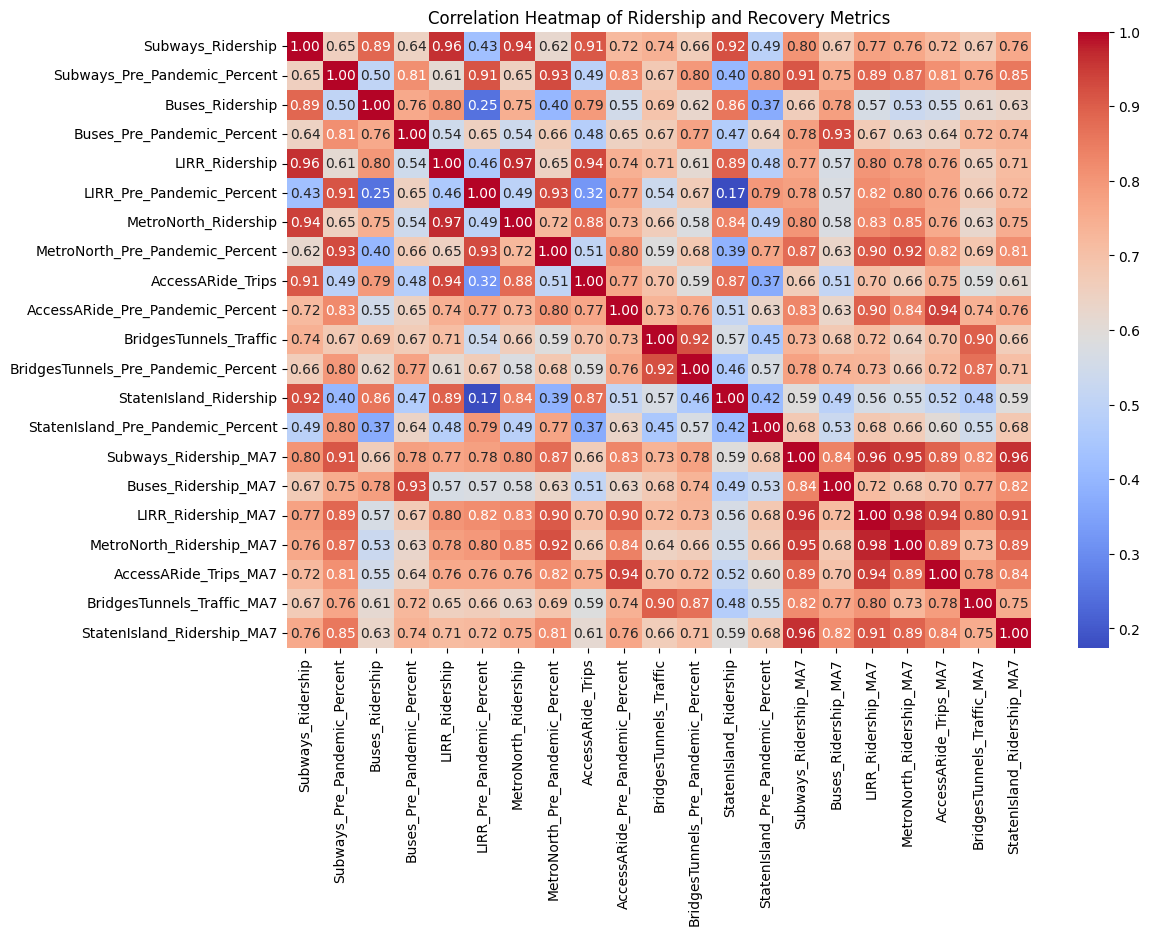

In [94]:
# Compute correlation matrix
correlation_matrix = mta_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Ridership and Recovery Metrics")
plt.show()